Optimization Functions

In [198]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import * #all functions loaded to local namespace
from numpy import *
from numpy.random import normal  # generates a sample of numbers drawn from the normal distribution
from scipy.optimize import fmin_cg
from scipy import optimize 

In [199]:
#import the dataset by giving its path

data = pd.read_csv(r"C:\Users\it\Desktop\Shuja's Own\Python Projects\Linear Regression\data.csv", header = None)
data

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


Optimization Functions

In [200]:
mydata = data.to_numpy()
print(mydata.shape)
X = mydata[:,0]
Y = mydata[:,1]
print(X)
print(Y)

(97, 2)
[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5

In [201]:
m = Y.shape[0]
X = np.stack([np.ones(m), X], axis=1)
print(X)

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [202]:
args = (X,Y)  # parameter values
m=len(X) # number of training examples
al=1  
lr2=[]

In [203]:
# cost function

def J(t,x,y):
  theta=t
  J = (1/(2*m))*np.sum(np.square(np.dot(X,theta)-y))
  lr2.append(J)
  return J

In [204]:
# gradient descent

def gradf(t,y, *args):
  theta =t
  theta = (1/m)*(np.dot(X,theta)-Y).dot(X)
  lr2.append(J)
  return theta

Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 6
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 4.476971
         Iterations: 90
         Function evaluations: 172


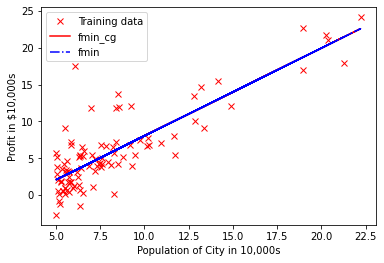

In [205]:
x0 = [0,0]  # Initial guess.                          #X0 IS A user-supplied initial estimate of xopt, 
                                                      # Fprime is a fn that returns the grad of f at x. We have given it equal to gradf # args are the arguments [X,Y]
res1 = optimize.fmin_cg(J, x0, fprime=gradf,args=args) #Minimize a function using a nonlinear conjugate gradient algorithm. 
lr1=list(lr2)

lr2=[]
res2 = optimize.fmin(J, x0, args=args) #Minimize a function using the downhill simplex algorithm.

plot(X[:,1],Y,'rx', X[:,1],np.dot(X, res1),'r', X[:,1], np.dot(X, res2),'b-.') #one scatter plot with red x, one line red one line blue (linear fit)
plt.ylabel('Profit in $10,000s'); # Set the y ? axis label
plt.xlabel('Population of City in 10,000s'); # Set the x ? axis label
plt.legend([ 'Training data','fmin_cg','fmin']);
plt.show()

Learning rates

No handles with labels found to put in legend.


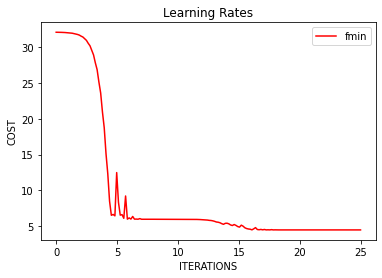

In [206]:
# plot learning rates of fmin and fmin_cg
xx = linspace(0,25,len(lr1))
xy = linspace(0,25,len(lr2))
#plt.subplot(2,1,1)

plt.title("Learning Rates")
 
#plt.plot( xx,lr1,'r',label='fmin_cg') # (lr1) learning rate 1 of fmin
plt.legend()
#plt.subplot(2,1,2)
plt.plot( xy,lr2,'r',label='fmin')  # (lr2)  learning rate 1 of fmin_cg
plt.ylabel('COST'); # Set the y  axis label
plt.xlabel('ITERATIONS'); # Set the x  axis label 
plt.legend() 
show()

In [207]:
def plotdata(X,Y):                   
  plt.scatter(X, Y, color= "red", marker= "x", s=30)
  plt.xlabel('Population of city in 10000s') 
  plt.ylabel('Profit in $1000s') 
  plt.title('Scatter Plot of Training Data')
  return

In [208]:
def computeCostVectorize(X,y , theta):
  m = y.size
  theta_2 = np.zeros(3)
  theta_3 = np.zeros(4)
  J = 0  
  if np.shape(X) == (97,3):
    theta = theta_2
  elif np.shape(X) == (97,4):
    theta = theta_3 
  h = np.dot(X, theta)
  J = (1/(2*m))*np.sum(np.square(h-y))
  return J

In [209]:
## ======================= Vectorize Gradient Descent =======================
def gradientDescentVectorize(X, y, theta, alpha, num_iters):
  m = y.shape[0]
  theta = theta.copy()
  grad = (1/m)*(np.dot(X,theta)-y).dot(X)
  theta = theta - grad*alpha
  J_history = []
 
  for i in range(num_iters):
    grad = (1/m)*(np.dot(X,theta)-Y).dot(X)
    theta = theta - alpha*grad
    J_history.append(computeCostVectorize(X, y, theta))  
  return theta, J_history

In [210]:
data = pd.read_csv(r"C:\Users\it\Desktop\Shuja's Own\Python Projects\Linear Regression\data.csv", header = None)
data

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [211]:
mydata = data.to_numpy()
print(mydata.shape)
X = mydata[:,0]
Y = mydata[:,1]
print(X)
print(Y)

(97, 2)
[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5

In [212]:
X=np.stack([np.ones(m),X, np.power(X,2)],axis=1)
X

array([[  1.        ,   6.1101    ,  37.33332201],
       [  1.        ,   5.5277    ,  30.55546729],
       [  1.        ,   8.5186    ,  72.56654596],
       [  1.        ,   7.0032    ,  49.04481024],
       [  1.        ,   5.8598    ,  34.33725604],
       [  1.        ,   8.3829    ,  70.27301241],
       [  1.        ,   7.4764    ,  55.89655696],
       [  1.        ,   8.5781    ,  73.58379961],
       [  1.        ,   6.4862    ,  42.07079044],
       [  1.        ,   5.0546    ,  25.54898116],
       [  1.        ,   5.7107    ,  32.61209449],
       [  1.        ,  14.164     , 200.618896  ],
       [  1.        ,   5.734     ,  32.878756  ],
       [  1.        ,   8.4084    ,  70.70119056],
       [  1.        ,   5.6407    ,  31.81749649],
       [  1.        ,   5.3794    ,  28.93794436],
       [  1.        ,   6.3654    ,  40.51831716],
       [  1.        ,   5.1301    ,  26.31792601],
       [  1.        ,   6.4296    ,  41.33975616],
       [  1.        ,   7.0708 

In [213]:
data = pd.read_csv(r"C:\Users\it\Desktop\Shuja's Own\Python Projects\Linear Regression\data.csv", header = None)
print(data)
mydata = data.to_numpy()
print(mydata.shape)
X = mydata[:,0]
Y = mydata[:,1]
X=np.stack([np.ones(m),X, np.power(X,2)],axis=1)
print(np.shape(X))
print(X)
print(Y)


          0         1
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]
(97, 2)
(97, 3)
[[  1.           6.1101      37.33332201]
 [  1.           5.5277      30.55546729]
 [  1.           8.5186      72.56654596]
 [  1.           7.0032      49.04481024]
 [  1.           5.8598      34.33725604]
 [  1.           8.3829      70.27301241]
 [  1.           7.4764      55.89655696]
 [  1.           8.5781      73.58379961]
 [  1.           6.4862      42.07079044]
 [  1.           5.0546      25.54898116]
 [  1.           5.7107      32.61209449]
 [  1.          14.164      200.618896  ]
 [  1.           5.734       32.878756  ]
 [  1.           8.4084      70.70119056]
 [  1.           5.6407      31.81749649]
 [  1.           5.3794      28.93794436]
 [  1.           6.3654  

Fitting second Order Polynomial through dataset.

The cost is 32.072733877455676
[0.01544231 0.08745197 0.05184516]


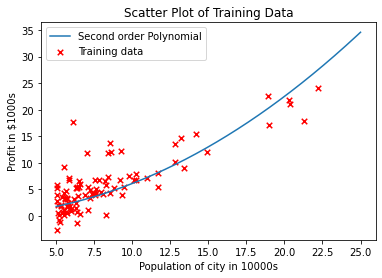

In [214]:
m=len(data)
cost= computeCostVectorize(X, Y, theta=np.array([0.0, 0.0,0.0]))
print("The cost is",cost )

theta_2 = np.zeros(3)

# some gradient descent settings
iterations = 1500
alpha = 0.00001

theta_2, J_history = gradientDescentVectorize(X ,Y, theta_2, alpha, iterations) 
print(theta_2)
# plot the 2nd Order fit
plotdata(X[:, 1],Y)
p = np.linspace(5, 25, 1000)
p=np.stack([np.ones(1000),p, np.power(p,2)],axis=1)

plt.plot(p[:, 1], np.dot(p, theta_2))  
plt.legend([ 'Second order Polynomial','Training data',]);

In [217]:
data = pd.read_csv(r"C:\Users\it\Desktop\Shuja's Own\Python Projects\Linear Regression\data.csv", header = None)
print(data)
mydata = data.to_numpy()
print(mydata.shape)
X = mydata[:,0]
Y = mydata[:,1]
X=np.stack([np.ones(m),X, np.power(X,2),np.power(X,3)],axis=1)
print(np.shape(X))
print(np.shape(X))
print(X)
print(Y)

          0         1
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]
(97, 2)
(97, 4)
(97, 4)
[[1.00000000e+00 6.11010000e+00 3.73333220e+01 2.28110331e+02]
 [1.00000000e+00 5.52770000e+00 3.05554673e+01 1.68901457e+02]
 [1.00000000e+00 8.51860000e+00 7.25665460e+01 6.18165378e+02]
 [1.00000000e+00 7.00320000e+00 4.90448102e+01 3.43470615e+02]
 [1.00000000e+00 5.85980000e+00 3.43372560e+01 2.01209453e+02]
 [1.00000000e+00 8.38290000e+00 7.02730124e+01 5.89091636e+02]
 [1.00000000e+00 7.47640000e+00 5.58965570e+01 4.17905018e+02]
 [1.00000000e+00 8.57810000e+00 7.35837996e+01 6.31209191e+02]
 [1.00000000e+00 6.48620000e+00 4.20707904e+01 2.72879561e+02]
 [1.00000000e+00 5.05460000e+00 2.55489812e+01 1.29139880e+02]
 [1.00000000e+00 5.71070000e+00 3.26120945e+01 1.86237888e+

Fitting third Order Polynomial through same dataset.

The cost is 32.072733877455676
[4.39986029e-05 3.13753989e-04 1.95158359e-03 2.74150473e-03]


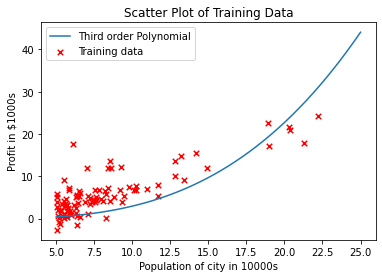

In [218]:
cost= computeCostVectorize(X, Y, theta=np.array([0.0, 0.0,0.0,0.0]))
print("The cost is",cost )

theta_3 = np.zeros(4)

# some gradient descent settings
iterations = 1500
alpha = 0.00000001

theta_3, J_history = gradientDescentVectorize(X ,Y, theta_3, alpha, iterations) 
print(theta_3)
# plot the 3rd order polynomial fit
plotdata(X[:, 1],Y)

p = np.linspace(5, 25, 1000)
p=np.stack([np.ones(1000),p, np.power(p,2),np.power(p,3)],axis=1)

plt.plot(p[:, 1], np.dot(p, theta_3)) 

plt.legend([ 'Third order Polynomial','Training data',]);